# Frontdoor Candidate Questions


Congratulations on making it to this stage of the interview process!  For the next step of your candidacy, you will be asked to solve five unique problems. Each question focuses on a distinct data science skill such as data access, data transformation, hypothesis testing, model evaluation, and lastly, you will be asked to interpret a report and make a recommendation. Please use Python unless specified otherwise.  All code and derived data must be included in your final submission. Document formats such as `.ipynb`, `.html`, and `.docx` are acceptable for submission. 

We will attempt to run your code, so if it references obscure libraries, please indicate this as well as how to locate/install them.  You need to be sure you do what the core task indicates; but, you should feel free to use novel and ingenious approaches. We also expect that the challenge should *not take more than two hours* to complete.

In evaluating your submission we will be considering the following:

1. **Completeness** and **correctness** of the project and codebase.
2. **Robustness** and **clarity** of the documentation included with the submission 
3. **Language selection** and **library dependency** appropriateness.
4. **Sophistication** and **ingenuity** in thinking and approach.

Each question also contains a bonus component. The bonus questions are entirely optional, and a few-sentence summary is sufficient.  

*Hint:* Clarity means articulating your assumptions, your approach, and your, results cleanly and concisely.  *Overly verbose code and responses can be detrimental to your score*.

When you have completed the challenge, email your results to the email address you received this packet from.

>**Notice of Confidentiality:** This document, scenario, and data are proprietary to Frontdoor, Inc. And cannot be copied or distributed without the expressed written permission by Frontdoor, Inc. Failure to adhere to this notice of confidentiality will result in immediate termination of the candidate's application.

## Question 1: Data Transformation

You may often need to 'wrangle' data into a representation that is better suited for a particular project.  This next question will test your ability to clean and order data. 

You have been presented with two dataframes: 

#### Dataframe A: Brands Serviced
In the home warranty business, dispatches are created when a contractor is selected to fulfill a home warranty claim.  

This dataframe contains two columns. The first one is a unique dispatch ID represented by an integer, the second is a string containing a collection of appliance brands that were serviced by the contractor during the dispatch.

| dispatch_id | brands             |
|-----------|------------------|
| 100100     | Kenmore, GE      |
| 100101     | Whirpool    |
| 100102     | Viking      |
| 100103     | GE      |
| 100104     | GE      |
| 100105     | Viking, Maytag     |
| 100106     | Maytag      |
| 100107     | Kenmore, GE, Maytag      |
| 100108     | Viking      |
| 100109     | GE      |
...


#### Dataframe B: Dispatch Assignments
The second dataframe contains two columns as well; the first one is a string that contains a customer name, the second is an integer that contains a dispatch ID.  The dispatch IDs from column two are the same as the dispatch IDs from column one of dataframe A.

| contractor | dispatch_id |
|----------|---------|
| A        | 100100     |
| A        | 100101     |
| B        | 100102      |
| C        | 100103      |
| C        | 100104      |
| B        | 100105      |
| A        | 100106      |
| C        | 100107      |
| B        | 100108      |
| A        | 100109      |

You are asked to write a function that receives two input data frames (Dataframe_A, Dataframe_B)and returns a dataframe with the following format, where the contents of cells represent the count of each brand type serviced by a respective contractor.  This function should accommodate the occurrence of new brand types that may be introduced to the data set over time (e.g., SmartHomeTech Appliances).

| Contractor | GE   | Kenmore    | Whirpool  | ... |
|----------|---------|---------|--------|-------------|
| A        | ?       | ?       | ?      | ?           |
| B        | ?       | ?       | ?      | ?           |
| C        | ?       | ?       | ?      | ?           |


After you have completed your code, evaluate it for performance bottlenecks and describe how you would improve the code.  

*Bonus Question:* If the two starting tables were in a relational database or Hadoop cluster and each had 100 million rows, how might your approach change?

In [1]:
# Library to pring formatted dataframes
!pip install tabulate

# Library to run sql on dataframe
!pip install pandasql

# tqdm library is used to display progress bars
!pip install tqdm

In [2]:
import pandas as pd
from tabulate import tabulate

tableA = [
    (100100, "Kenmore, GE"),
    (100101, "Whirpool"),
    (100103, "Viking"),
    (100104, "GE"),
    (100105, "GE"),
    (100106, "Viking, Maytag"),
    (100107, "Kenmore, GE, Maytag"),
    (100108, "Viking"),
    (100109, "GE")
]
labels = ["dispatch_id", "brands"]
dfA = pd.DataFrame.from_records(tableA, columns=labels)

tableB = [
    ("A", 100100),
    ("A", 100101),
    ("B", 100102),
    ("C", 100103),
    ("C", 100104),
    ("B", 100105),
    ("A", 100106),
    ("C", 100107),
    ("B", 100108),
    ("A", 100109),
]
labels = ["contractor", "dispatch_id"]
dfB = pd.DataFrame.from_records(tableB, columns=labels)

<h3> Question 1; Part 1: Implementing function:-</h3>

In [3]:
# Assumption:-
# 1] dispact_id:100102 is present in 'tableB' ,but not present in 'tableA', so we will assume that the data for the same
#    is missing in 'tableA'.We will print the same as warinings and also return the same as missing list

# Explode comma seperated brands , and get them in a seperate column

def get_contractor_brand_mapping(dfA,dfB,return_missing=False):
    '''
        This function takes in 3 arguments as:-
        dfA: dataframe containing Brands Serviced information with columns ["dispatch_id", "brands"]
        dfB: dataframe containing Dispatch Assignments information with columns ["contractor", "dispatch_id"]
        return_missing : weather to return dispath_id, missing in dfA but present in dfB
        
        returns:-
        1] Sparse count matrix for contractor to brand 
        2] If return_missing=True it also returns dataframe containing contractor,dispath_id, 
           missing in dfA but present in dfB
    '''    
    
    # Check for missing dispatch_id and display a warining
    missing_dpid=dfB.loc[~dfB.dispatch_id.isin(dfA['dispatch_id']),:]
    if len(missing_dpid)>0:
        print('!!!!!! Warning the following dispatch_ids are not present in Beand Sercviced dataframe :- \n',
               tabulate(missing_dpid,headers='keys', tablefmt='psql',showindex=False))
    
    # Step1: Convert brands from string to list and explod to get single brand in single column
    brands_lst=dfA['brands'].apply(lambda x:x.split(',') if x!=None else x)   
    dfA=pd.DataFrame({'dispatch_id':dfA['dispatch_id'],'brands':brands_lst}).explode('brands')
    
    # Step2: Join dfA and dfB on 'dispatch_id'
    df_merged=pd.merge(dfA,dfB,on='dispatch_id',how='left')
    
    # Step3: Call pivot table get the Sparse count matrix for contractor to brand
    final_df=pd.pivot_table(df_merged, 
                            index='contractor',
                            values='dispatch_id', 
                            columns='brands', 
                            aggfunc='count',
                            fill_value=0)
    
    # Step3: Return the result
    if return_missing:
            return final_df.reset_index().rename_axis(None, axis=1),missing_dpid
    return final_df.reset_index().rename_axis(None, axis=1)
    

<h3> Question 1; Part 2: Evaluate performance:-</h3>

Lets check :- <br>
    1] The time for execution<br>
    2] And memory consumed by generated dataframe<br>

In [4]:
import time

start=time.time()
df=get_contractor_brand_mapping(dfA,dfB)
end=time.time()-start
print('\n1] Time taken for Code execution:',round(end,3),'(sec)')
print('2] Memory consumed by returned dataframe:',df.memory_usage(deep=True).sum(),'(bytes)')

!!!!!! Warning the following dispatch_ids are not present in Beand Sercviced dataframe :- 
 +--------------+---------------+
| contractor   |   dispatch_id |
|--------------+---------------|
| B            |        100102 |
+--------------+---------------+

1] Time taken for Code execution: 0.024 (sec)
2] Memory consumed by returned dataframe: 446 (bytes)


In [5]:
start=time.time()
# Step1: Convert brands from string to list and explod to get single brand in single column
brands_lst=dfA['brands'].apply(lambda x:[y.strip() for y in x.split(',')] if x!=None else x)
dfA_exl=pd.DataFrame({'dispatch_id':dfA['dispatch_id'],'brands':brands_lst}).explode('brands')

# Step2: Join dfA and dfB on 'dispatch_id'
df_merged=pd.merge(dfA_exl,dfB,on='dispatch_id',how='left')

df_grp=df_merged.groupby(['brands','contractor'],as_index=False).count()
print(tabulate(df_grp,headers='keys', tablefmt='psql',showindex=False))
end=time.time()-start
print('\n1] Time taken for Code execution:',round(end,3),'(sec)')
print('2] Memory consumed by returned dataframe:',df_grp.memory_usage(deep=True).sum(),'(bytes)')

+----------+--------------+---------------+
| brands   | contractor   |   dispatch_id |
|----------+--------------+---------------|
| GE       | A            |             2 |
| GE       | B            |             1 |
| GE       | C            |             2 |
| Kenmore  | A            |             1 |
| Kenmore  | C            |             1 |
| Maytag   | A            |             1 |
| Maytag   | C            |             1 |
| Viking   | A            |             1 |
| Viking   | B            |             1 |
| Viking   | C            |             1 |
| Whirpool | A            |             1 |
+----------+--------------+---------------+

1] Time taken for Code execution: 0.009 (sec)
2] Memory consumed by returned dataframe: 1499 (bytes)


The pivote table operation used in the above code consumes more time.
Also since the returned dataframe is a sparse matrix, it consumes more memory, this is because most of the values are '0' as highlighted in red below , but still consumes unnecessary memory space, if the data is in millions.

<table>
<thead>
<tr><th>contractor  </th><th style="text-align: right;">   GE</th><th style="text-align: right;">   Maytag</th><th style="text-align: right;">  GE</th><th style="text-align: right;">  Kenmore</th><th style="text-align: right;">  Viking</th><th style="text-align: right;">  Whirpool</th></tr>
</thead>
<tbody>
<tr><td>A           </td><td style="text-align: right;">    1</td><td style="text-align: right;">        1</td><td style="text-align: right;">   1</td><td style="text-align: right;">        1</td><td style="text-align: right;">       1</td><td style="text-align: right;">         1</td></tr>
<tr><td>B           </td><td style="text-align: right;color:red">    0</td><td style="text-align: right;color:red">        0</td><td style="text-align: right;">   1</td><td style="text-align: right;color:red">        0</td><td style="text-align: right;">       1</td><td style="text-align: right;color:red">         0</td></tr>
<tr><td>C           </td><td style="text-align: right;">    1</td><td style="text-align: right;">        1</td><td style="text-align: right;">   1</td><td style="text-align: right;">        1</td><td style="text-align: right;">       1</td><td style="text-align: right;color:red">         0</td></tr>
</tbody>
</table>

To overcome this we may convert the same to compressed row format, which:-<br> 
1] Since string storage We assing a unique id to each brand and contractor, and store them in the table<br>
2] Rather than storing it in a Sparse matrix format we can store it in row format. <br>
<table>
<thead>
<tr><th>contractor_id  </th><th style="text-align: right;">   Brand_id</th><th style="text-align: right;">   service_count</th></tr>
</thead>
<tbody>
    <tr><td>1</td><td>1</td><td>1</td></tr>
    <tr><td>3</td><td>2</td><td>2</td></tr>    
    <tr><td>...</td><td>...</td><td>...</td></tr>
</tbody>
</table>    
Where:-<br>

1] Brand_id to Brand can be stored in a table:-
<table>
<thead>
<tr><th>Brand_id  </th><th style="text-align: right;">   Brand</th></tr>
</thead>
<tbody>
    <tr><td>1</td><td>GE</td></tr>
    <tr><td>2</td><td>Maytag</td></tr>   
    <tr><td>...</td><td>...</td></tr>
</tbody>
</table>

<br>
2] contractor_id to contractor can be stored in another table:-
<table>
<thead>
<tr><th>contractor_id  </th><th style="text-align: right;">   contractor</th></tr>
</thead>
<tbody>
    <tr><td>1</td><td>A</td></tr>
    <tr><td>3</td><td>C</td></tr>    
    <tr><td>...</td><td>...</td></tr>
</tbody>
</table> 

<h3> Question 1; Part 3 (Bonus): Execution in Bigdata Env:-</h3>

<b>Answer:-</b><br>
    1] In Big data environment, I would use sparkSQl or HiveSQL to execute the above query. <br>
    2] I would use split to convert 'brands' list to array and use lateral view explode to get it in rows. <br>
    3] I would use various optimization techniques like map side join. <br>

## Question 2: Data Access

An often encountered step to data pre-processing usually involves querying data that exists within a relational database system. Typically such data may be transactional in nature, and as a result, it is optimized for a relational data model. While this format is critical for performance, efficient storage, and quick updates, it is often not suitable for data science work. In this next question, you will be asked to access data from a fictitious relational database and perform query operations to get it into a suitable format for analysis. The required output for this question is the correct SQL code and query results, you may use any dialect of SQL you wish, but submissions in any other language will be considered incorrect.

You have been granted access to a database that contains two tables, `Contractor_Invoice_Detail` and `Item_Detail`, that are stored in a relational format.  `Contractor_Invoice_Detail` contains transactional information and possesses the following schema:

#### Table Contractor_Invoice_Detail Schema

> **invoice_id:** The unique id for invoice submitted by a contractor after servicing a customer claim.
>
> **invoice_line:** A unique id for each item associated with an invoice (e.g., both a refrigerator and a dishwasher may show up on the invoice)
>
> **market_id:** The market region where the contractor performed services.
>
> **time_stamp:** The date of the services.
>
> **covered_item:** The unique id for the item serviced. Every item type has a unique id.
>
> **hours:** The number of hours billed by the contractor
>
> **rate:** The contractor's billable rate (hourly).
>
> **part_cost:** The gross cost of replacement parts.
>
> **service_fee:** The fee collected from the homeowner at the time of service.  *Note:* The service fee will only show up on the first invoice_line for each invoice_id.

| invoice_id | invoice_line | market_id | time_stamp | covered_item | hours | rate  | part_cost | service_fee | 
|------------|--------------|----------|------------|---------------|-------|----------|-----------|-----------| 
| 10000001   | 31215        | 3        | 9/3/19     | 3000          | 1.5   | 65       | 0         | 35 | 
| 10000001   | 31216        | 3        | 9/3/19     | 3354H         | 3     | 65       | 18.00     | 0  |
| 10000002   | 91455        | 1        | 9/5/19     | 1234          | 2     | 80       | 20.00     | 35 |
| 10000003   | 59943        | 2        | 9/5/19     | 3000          | .5    | 70       | 0         | 35 |
| 10000004   | 95027        | 2        | 9/5/19     | 18518         | 1     | 95       | 70.50     | 55 |
| 10000005   | 73994        | 2        | 9/5/19     | 12HA12        | 4     | 90       | 0         | 35 |
| 10000006   | 98464        | 1        | 10/1/19    | wh30000       | 1     | 65       | 45.00     | 35 |


#### Table Item_Detail Schema
> **covered_item:** The unique id for the item serviced. Every item type has a unique id.
>
> **item_description:** The listed name for a given product category.
>
> **key_internal:** No documentation exists for this field. 

| item_id | item_description     | key_internal|
|---------|---------     |  ---------  |
| 3000    | Washer       |  17375273   |
| 3354H   | Dryer        |  15477787   |
| 1234    | Microwave    |  97845235   |
| 18518   | Dishwasher   |  47813334   |
| 12HA12  | Oven         |  48573988   |
| wh30000 | Refrigerator |  00000000   |

Your task is to construct a single SQL query that returns the **total expense** (`rate` * `hours` + `part_cost` - `adjusted_service_fee`) and the **average expense** by the market_id and item description for invoices in 2019, with the output ordered by decreasing **average expense**.

*Important Note:* If there are multiple invoice lines for an invoice, the service fee will only show up on one invoice line. In calculating the total and average expenses, an adjusted service fee should be used.  For example, if there are 3 invoicelines associated with an invoice id, having service feees of \$30, \$0, and \$0, the service fee amount applied to each invoice line should be $10.

*Bonus Question:* How would you use Python to access this data and perform these operations?

<h3> Question 1; Part 1 : SQL Query:- </h3>

In [6]:
# Assumptions:-
# 1] 'covered_item' from 'Contractor_Invoice_Detail' table and 'item_id' from 'Item_Detail' table are both refer to 
#    'The unique id for the item serviced' , and 'item_id' from 'Item_Detail' table is the foreign key which maps to  
#    'covered_item' in 'Contractor_Invoice_Detail' table
#
# 2] The 'time_stamp' is in format mm/dd/yy
#
# 3] All date years will be considered 
#
# 4] pandassql has been used to run and test the query : https://pypi.org/project/pandasql/
#
# 5] For below sql sqllight:'https://sqlite.org/index.html' syntaxes have been followed, and all dates have been conidered
#    as strings.


import pandasql as ps
from io import StringIO

######################### Code to generate python dataframe to test sql ########################################
Contractor_Invoice_Detail_str=StringIO("""invoice_id,invoice_line,market_id,time_stamp,covered_item,hours,rate,part_cost,service_fee
                                            10000001,31215,3,9/3/19,3000,1.5,65,0,35
                                            10000001,31216,3,9/3/19,3354H,3,65,18,0
                                            10000002,91455,1,9/5/19,1234,2,80,20,35
                                            10000003,59943,2,9/5/19,3000,0.5,70,0,35
                                            10000004,95027,2,9/5/19,18518,1,95,70.5,55
                                            10000005,73994,2,9/5/19,12HA12,4,90,0,35
                                            10000006,98464,1,10/1/19,wh30000,1,65,45,35
                                            10000006,98464,1,10/1/18,wh30000,1,65,45,35
                                            10000006,98464,1,10/1/18,wh30000,1,65,45,35
                                            """)
Contractor_Invoice_Detail=pd.read_csv(Contractor_Invoice_Detail_str, sep=",")


Item_Detail_str=StringIO("""item_id,item_description,key_internal
                            3000,Washer,17375273
                            3354H,Dryer,15477787
                            1234,Microwave,97845235
                            18518,Dishwasher,47813334
                            12HA12,Oven,48573988
                            wh30000,Refrigerator,0""")
Item_Detail=pd.read_csv(Item_Detail_str)


########################### Final SQl Query ##############################################################################
# *Note: Comments in the below query are starting with '--', above the statements.

ps.sqldf("""SELECT 
              c.time_stamp, 
              c.market_id, 
              i.item_description, 
              -- Calculating total_expense and average_expense
               sum(
                 c.rate * c.hours + c.part_cost - c.adjusted_service_fee
               ) AS total_expense, 
               avg(
                 c.rate * c.hours + c.part_cost - c.adjusted_service_fee
               ) AS average_expense 
            FROM 
              (
                SELECT 
                  *,                  
                  -- Calculating adjusted_service_fee by taking average for each invoice_id using analytical function
                   avg(service_fee) OVER (PARTITION BY invoice_id) AS adjusted_service_fee 
                FROM 
                  Contractor_Invoice_Detail 
                -- fiter out records of year 2019
                 WHERE 
                   time_stamp LIKE '%/19'
              ) AS c 
              JOIN Item_Detail AS i ON trim(c.covered_item) = trim(i.item_id) 
            GROUP BY 
              c.market_id, 
              i.item_description, 
              c.time_stamp 
            ORDER BY 
              average_expense DESC
            """)

,time_stamp,market_id,item_description,total_expense,average_expense
0,9/5/19,2,Oven,325.0,325.0
1,9/3/19,3,Dryer,195.5,195.5
2,9/5/19,1,Microwave,145.0,145.0
3,9/5/19,2,Dishwasher,110.5,110.5
4,9/3/19,3,Washer,80.0,80.0
5,10/1/19,1,Refrigerator,75.0,75.0
6,9/5/19,2,Washer,0.0,0.0


<h3> <u>Question 1; Part 2 : Bonus:- </u></h3>

<b>Answer:-</b><br><br>
1] The same can be done in python using <b>pandas api</b> as well, if the data is availabe as csv. <br><br>
2] If the data is huge than the processing needs to  be done on database side. In this case we can establish a connection to the databse like for mysql we can use 'MySQLdb' module to establish the connection as :- <br>

db = MySQLdb.connect("localhost","testuser","test123","TESTDB" )

and execute the query as :-<br>
cursor = db.cursor()
cursor.execute("selec * from Contractor_Invoice_Detail ....")

## Question 3: Hypothesis Testing
After starting at Frontdoor, you've been asked to help with a marketing campaign on a promotional webpage aimed.  You have been asked to analyze the results of a randomized, controlled experiment and provide a recommendation.  For this experiment, each visitor to the site is randomly exposed to one of four possible adverts, each depicting a contractor fixing a different home item (e.g., a kitchen faucet or an air conditioning unit).  Visitors are then tracked to see which ones end up purchasing a home warranty plan.  Based on the data provided, what would your recommendation be?  Would you recommend one of the four adverts be presented to all visitors?

| Advert   | Views     | Home Warranty Purchases 
|----------|-----------|----------|
| A        | 21        | 3        | 
| B        | 180       | 30       | 
| C        | 250       | 50       | 
| D        | 100       | 15       | 

*Bonus Question:* How would your analysis change if the visitors and purchase counts numbered in the millions? 

<h3>Question 3:Part 1 Hypothesis Testing</h3>

Lets check the conversion rate for each Advert :- <br><br>
<i>conversion rate = Home Warrenty Purchased / Views</i>

Text(0, 0.5, 'conversion rate (%)')

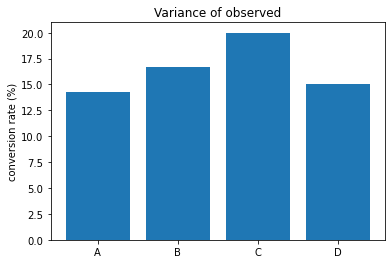

In [7]:
from matplotlib import pyplot as plt

# Reading the data in a dataframe
experiment=pd.DataFrame({'Advert':['A','B','C','D'],
               'Views':[21,180,250,100],
               'Home_Warranty_Purchases':[3,30,50,15]})

#calculating conversion rate
experiment['conversion_rate']=experiment['Home_Warranty_Purchases']/experiment['Views']

plt.bar(experiment['Advert'],experiment['conversion_rate']*100)
plt.gca().set_title('Variance of observed')
plt.gca().set_ylabel('conversion rate (%)')

<b>Clearly the difference between the conversion rates is not that significant to select any one</b>

<h3>Hypothesis formulation and Chi-square test :-</h3>

* To test the significance of each Advert and group of adverts we will use <b>chi-square test p-value</b>
* For this test the following is the null hypothesis:- <br>
    &emsp;<b> Null Hypothesis:</b> For each Advert the obseved count of 'Home Warranty Purchases' is just by chance ,i.e. these are not significant difference between obseved count of 'Home Warranty Purchases' for individual Advert <br>
    
   &emsp;<b> Alternate Hypothesis:</b>For each Advert the obseved count of 'Home Warranty Purchases' is significantly<br>                                         &emsp;&emsp;&emsp;differnet form remaining.
   
   &emsp;<b> alpha:</b>0.05 <br>
   
   if p-value < 0.05 than we reject the Null Hypothesis.
   

In [8]:
from scipy import stats
import numpy as np

# Calculate Views who have not purchased Home warrenty
experiment['Not_purchased']=experiment['Views']-experiment['Home_Warranty_Purchases']

# Function to calculate chi-square test
def get_p_value(a):
    ''' This function runs chi-square test for each of the Advert taken as imput and returns a p-value'''
    a_df=experiment.loc[experiment.Advert.isin(a),:]
    nona_df=experiment.loc[~experiment.Advert.isin(a),:].sum()    
    exp=np.array([[a_df['Home_Warranty_Purchases'].values[0],a_df['Not_purchased'].values[0]],
             [nona_df['Home_Warranty_Purchases'],nona_df['Not_purchased']]])
    chi2, p_value, df, _ = stats.chi2_contingency(exp)    
    return np.round(p_value,3)

In [9]:
print('P-Value for significance of Advert A:',get_p_value(['A']))
print('P-Value for significance of Advert B:',get_p_value(['B']))
print('P-Value for significance of Advert C:',get_p_value(['C']))
print('P-Value for significance of Advert D:',get_p_value(['D']))

P-Value for significance of Advert A: 0.891
P-Value for significance of Advert B: 0.719
P-Value for significance of Advert C: 0.26
P-Value for significance of Advert D: 0.509


<b>As can be seen above none of the p-values are significant enough(<0.05) to reject the null hypothesis. </b><br>
Hence No from the observations till now i would not recommend any of the four adverts be presented to all visitors

<h4>Question 3:Part 2 Hypothesis Testing</h4>
How would your analysis change if the visitors and purchase counts numbered in the millions? <br>
<b>Answer:-</b> <br>
1] I would use random subsampling to subsample the data and calculate the statistics on that sample. <br>
2] Or Would use big data tools to aggregate the count of 'Views' and 'Home Warranty Purchases' and than calculate the test statistics on the same.

## Question 4: Forecasting

For this question, you will be provided with ficticious data related to the count of calls recieved at our call center for the past one hundred days.  You are now asked to create a forecast for the next sixty days using this data.  

In [10]:
from datetime import datetime

callData = {'date': ["1/1/2020","1/2/2020","1/3/2020","1/4/2020","1/5/2020","1/6/2020","1/7/2020","1/8/2020","1/9/2020","1/10/2020",
"1/11/2020","1/12/2020","1/13/2020","1/14/2020","1/15/2020","1/16/2020","1/17/2020","1/18/2020","1/19/2020","1/20/2020",
"1/21/2020","1/22/2020","1/23/2020","1/24/2020","1/25/2020","1/26/2020","1/27/2020","1/28/2020","1/29/2020","1/30/2020",
"1/31/2020","2/1/2020","2/2/2020","2/3/2020","2/4/2020","2/5/2020","2/6/2020","2/7/2020","2/8/2020","2/9/2020","2/10/2020",
"2/11/2020","2/12/2020","2/13/2020","2/14/2020","2/15/2020","2/16/2020","2/17/2020","2/18/2020","2/19/2020","2/20/2020",
"2/21/2020","2/22/2020","2/23/2020","2/24/2020","2/25/2020","2/26/2020","2/27/2020","2/28/2020","3/1/2020","3/2/2020","3/3/2020",
"3/4/2020","3/5/2020","3/6/2020","3/7/2020","3/8/2020","3/9/2020","3/10/2020","3/11/2020","3/12/2020","3/13/2020","3/14/2020",
"3/15/2020","3/16/2020","3/17/2020","3/18/2020","3/19/2020","3/20/2020","3/21/2020","3/22/2020","3/23/2020","3/24/2020",
"3/25/2020","3/26/2020","3/27/2020","3/28/2020","3/29/2020","3/30/2020","3/31/2020","4/1/2020","4/2/2020","4/3/2020",
"4/4/2020","4/5/2020","4/6/2020","4/7/2020","4/8/2020","4/9/2020","4/10/2020"],
     'calls': [16215, 16484, 15877, 14780, 12622, 12607, 12362, 12912, 12367, 13991, 14562, 14761, 13735, 13386, 12023
     , 11504, 11795, 13127, 12971, 14433, 16094, 17120, 17184, 18188, 16540, 16693, 16031, 14601, 15447, 15716, 15042
     , 15039, 14197, 12339, 13095, 12764, 11386, 10621, 11256, 10997, 12614, 12480, 14006, 14436, 13711, 12115, 11612
     , 12812, 13036, 12844, 11745, 13598, 12914, 13813, 14634, 14995, 16356, 15731, 17142, 18383, 18686, 21692, 21800
     , 21502, 21786, 20292, 19104, 18193, 18341, 17314, 16861, 16853, 17992, 18246, 18968, 17741, 16718, 16335, 15898
     , 15666, 16600, 18110, 18401, 18370, 18346, 17691, 18643, 18489, 19289, 17290, 16668, 17804, 16989, 17976, 16239
     , 15444, 14951, 13434, 13655, 13105]}

call_df = pd.DataFrame(data = callData)

# Convert string to date
call_df['date']=call_df['date'].apply(lambda x:datetime.strptime(x, '%m/%d/%Y'))

# Sort the series by date
call_df.sort_values(by='date',ascending=True,inplace=True)

# Set date as index
call_df.set_index('date',inplace=True)


<h4>* Lets Vizualize the time series:-</h4>

Text(0.5, 0, 'Calls received')

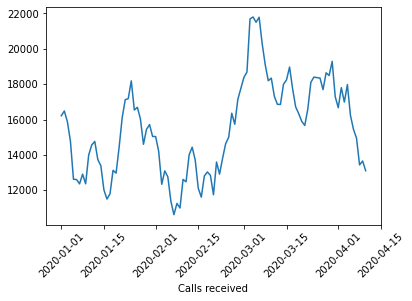

In [11]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np


plt.plot(call_df)
plt.xticks(rotation=45)
plt.gca().set_xlabel('Calls received')

Observations:-<br>
1] We can see some monthly cyclicity in the data.

<b>Dickey Fuller test to see if series is stationary :-</b><br>
This test is used to assess whether or not a time-series is stationary.
Stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.).If a series is stationary it cannot be modelled further. <br>

lets consider convidence inteval alpha=0.05<br>
if p-value returned by Dickey Fuller test is <0.05 than the series is stationary

In [12]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(call_df.calls.dropna())
print("P-value = {:.3f}".format(dftest[1]))

P-value = 0.129


since 0.129>0.05 hence the series is not stationary <br>
since series is not stationary we will use Holt Winter Exponential to model the same

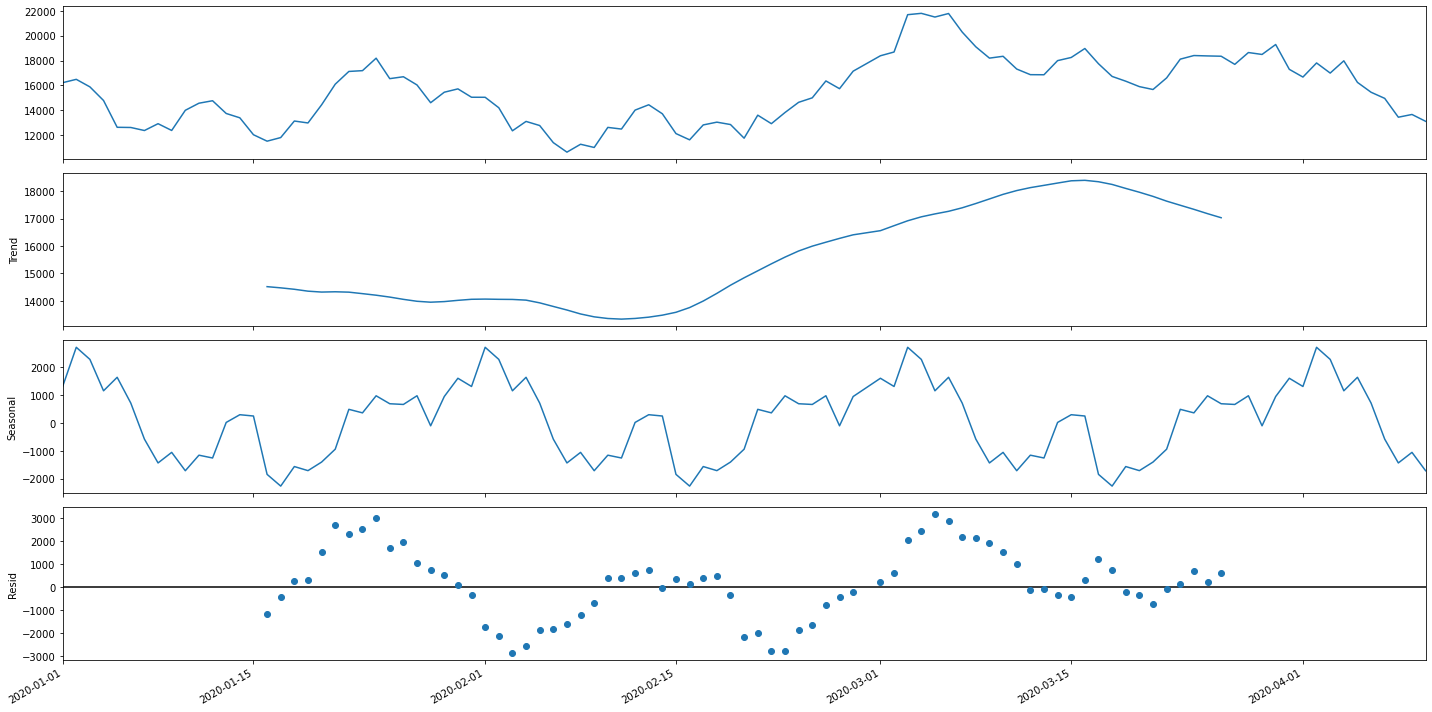

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt
from pylab import rcParams

decompose_result = seasonal_decompose(call_df,model='addative',period=30)

fg=decompose_result.plot()
ast=fg.axes
fg.autofmt_xdate()
fg.set_figheight(10)
fg.set_figwidth(20)

plt.tight_layout()

<h4>Holt Winter Exponential Modelling:-</h4><br>

Since series is not stationary, and also clearly shows some seasonlality we will use <b>Holt Winter Exponential Model</b> for forecasting:-<

Lets do a <b>hyper parameter</b> search for :-<br>
* <b>trend component:</b> to be modelled as 'addative' or 'multiplicative'
* <b>seasonal component:</b> to be modelled as 'seasonal' or 'multiplicative'
* <b>period for seasonality:</b> from range 30 to 50
* Since we have very less data to capture long term seasonality, we will use the complete data for modelling , and calculate MAPE,described below on predictions from training data itself, and later visually fine tune if required.<br>

Mean Absolute Percentage Error is defined as :-<br>

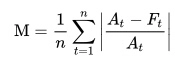

Where <br>
M	= 	mean absolute percentage error<br>
n	= 	number of times the summation iteration happens<br>
A_t	= 	actual value<br>
F_t	= 	forecast value<br>

* Since we have very less data to capture long term seasonality we will start with a higher value of 'period' , which defines the seasonality frequency , i.e. from 30 to 50 to introduce a little bias to reduce overfitting, and later visually fine tune if required.
* We will also check the stationarity of the residual series using Dickey Fuller p-value
    

In [14]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Prepare a dataframe for hyperparameters
hyper_params=pd.DataFrame({'periods':[x for x in range(30,50,1)]*2,
              'trend':['add']*20 + ['mul']*20,
              'seasonal':['add']*20 + ['mul']*20})

result_hparams=pd.DataFrame([])

# Iterate over hyper_params data frame and generate model
for k,row in tqdm(hyper_params.iterrows(),total=hyper_params.shape[0]):    
    mape_lst=[]        
    fitted_model = ExponentialSmoothing(call_df,trend=row['trend'],seasonal=row['seasonal'],seasonal_periods=row['periods']).fit()
    y_pred=fitted_model.fittedvalues
    mape_lst.append(np.mean(np.abs(call_df['calls'].values - y_pred)/np.abs(call_df['calls'].values)))
    dftest = adfuller(call_df['calls'].values - y_pred)[1]
    result_hparams=result_hparams.append({'periods':row['periods'],
                                          'trend':row['trend'],
                                          'seasonal':row['seasonal'],
                                          'MAPE':np.mean(mape_lst),
                                          'Dickey_Fuller_p-val':dftest},ignore_index=True)

result_hparams.sort_values('MAPE')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.66it/s]


,Dickey_Fuller_p-val,MAPE,periods,seasonal,trend
19,1.388172e-06,0.038857,49.0,add,add
21,3.912542e-04,0.040234,31.0,mul,mul
1,2.497469e-17,0.041231,31.0,add,add
11,3.846343e-07,0.041246,41.0,add,add
14,1.350145e-11,0.041384,44.0,add,add
13,8.332505e-08,0.041626,43.0,add,add
18,1.732664e-08,0.042630,48.0,add,add
32,3.510507e-11,0.042877,42.0,mul,mul
12,1.594315e-11,0.043249,42.0,add,add
39,3.929333e-06,0.043864,49.0,mul,mul


In [15]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.stattools import adfuller


def plot_figure_get_result_df(trend,seasonal,seasonal_periods):
    '''This function generates a ExponentialSmoothing based on input paramets 
       and returs forecasted calls for next 60 days'''
    call_df_cpy=call_df.copy()
    
    # Fit a ExponentialSmoothing model on complete data
    fitted_model=ExponentialSmoothing(call_df_cpy,trend=trend,seasonal=seasonal,seasonal_periods=seasonal_periods).fit()
    
    call_df_cpy['Fitted'] = fitted_model.fittedvalues
    call_df_cpy['Forecasted']=np.nan

    datetime_object = datetime.strptime('4/10/2020', '%m/%d/%Y')
    datelist = pd.date_range(datetime_object, periods=60).tolist()
    
    # get p value for dickey fuller test on residual series
    dftest = adfuller(call_df_cpy['calls'].values-call_df_cpy['Fitted'].values)[1]
    print(dftest)
    
    #Create result data frame containing forecasted results
    fore_df=pd.DataFrame({'date':datelist,'Forecasted':fitted_model.forecast(60)}).set_index('date')
    
    # lotting the results
    fig=plt.figure(figsize=(50,5))
    call_df_cpy[['calls','Fitted']].plot(title='Holt Winters Model')    
    plt.plot(fore_df.index,fore_df['Forecasted'],color='green',label='Forecasted')
    plt.gca().set_xlabel('calls')
    plt.gca().set_title('Dickey Fuller p-value for residual:' + str(dftest))
    plt.legend()
    plt.tight_layout()
    return fore_df

<h4>Finetuning and selecting best model:-</h4>

Lets try out the plotting top4 configurations:-

In [16]:
result_hparams.sort_values('MAPE').head(4).reset_index(drop=True)

,Dickey_Fuller_p-val,MAPE,periods,seasonal,trend
0,1.388172e-06,0.038857,49.0,add,add
1,3.912542e-04,0.040234,31.0,mul,mul
2,2.497469e-17,0.041231,31.0,add,add
3,3.846343e-07,0.041246,41.0,add,add


<b>Model#1:-</b>

1.3881719251614341e-06


<Figure size 3600x360 with 0 Axes>

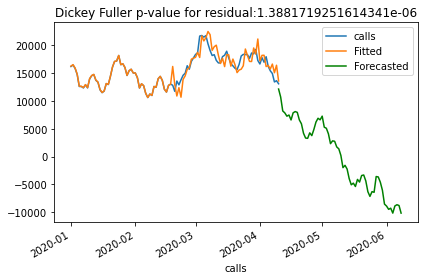

In [17]:
fore_df=plot_figure_get_result_df('add','add',49)

<b>Model#1 Inferencing:-</b><br>
Seems overfitted on training data and capturing downward trend sharplly. <br>

So we can <b> REJECT</b> this model

<b>Model#2:-</b>

0.00039125420669819557


<Figure size 3600x360 with 0 Axes>

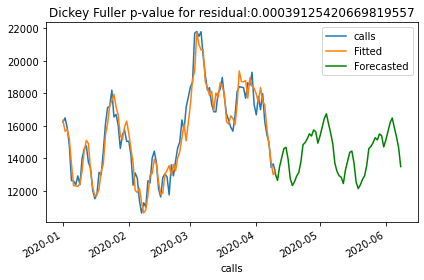

In [18]:
fore_df=plot_figure_get_result_df('mul','mul',31)

<b>Model#2 Inferencing:-</b><br>
1] Seems capturing good trend and cyclicity as compared to Model#1.
2] Doesnot seems overfitted and p-value of residual is also below 0.05

This model is a good candidate for final model

<b>Model#3:-</b>

2.497469372648652e-17


<Figure size 3600x360 with 0 Axes>

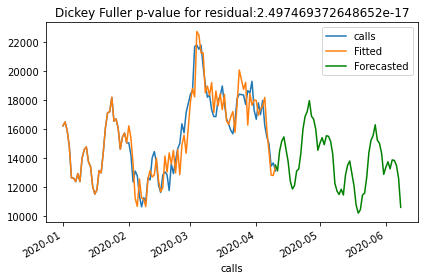

In [19]:
fore_df=plot_figure_get_result_df('add','add',31)

<b>Model#3 Inferencing:-</b><br>
1] Seems capturing good trend and cyclicity as compared to Model#2.<br>
2] Doesnot seems overfitted and p-value of residual is also below 0.05.<br>
3] p-value of this model is less than that of Model#2.<br>

This model is a good candidate for final model,lets ignore Model#2 and take Model#3 as the <b>latest best</b>.

<b>Model#4 (BEST FINAL MODEL):-</b>

3.846342820848591e-07


<Figure size 3600x360 with 0 Axes>

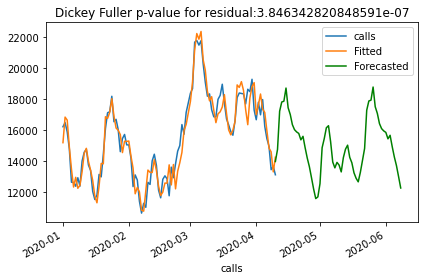

In [20]:
final_fore_df=plot_figure_get_result_df('add','add',41)

<b>Result:-<b>

<b>Model#4 Inferencing:-</b><br>
1] Seems capturing good trend and cyclicity as compared to Model#3.<br>
2] Doesnot seems overfitted and p-value of residual is also below 0.05.<br>
3] p-value of this model is more than that of Model#3.<br>
4] Seems to have less effect of downward trend after April 2020 (2020-04 on x-axis), hence this can be considered as best model.

This model is a good and can be considered final model,lets ignore Model#3 and take Model#4 as the <b>latest best</b>.

<br><b>Forecasting results for 60 days:-</b>

In [21]:
final_fore_df

,Forecasted
date,
2020-04-10,13963.389891
2020-04-11,14742.754550
2020-04-12,17220.403399
2020-04-13,17817.992575
2020-04-14,17868.232823
2020-04-15,18720.111555
2020-04-16,17444.405609
2020-04-17,17009.287438
2020-04-18,16349.791988


## Question 5: Data Analysis

A new startup, EZ Yard, has recently caught the attention of Frontdoor leadership due to its relevance in "taking the hassle out of home ownership".  EZ Yard promises to keep your yard beautiful for a monthly subscription.

The founders of EZ Yard have recently approached Frontdoor, to see if Frontdoor would be interested in acquiring their company.  As a Data Scientist at Frontdoor, you have been asked to help evaluate if acquiring EZ Yard would be a good investment.  

You have been provided two resources to help with your analysis; a company fact sheet provided by ShinyFancyObjects, and a table containing data about their customer history.  Using these two pieces of information, would you recommend acquisition of EZ Yard as a long-term investment, and explain why or why not.


**EZ Yard Fact Sheet; Helping you have a green lawn without the hassle**

* EZ Yard posses a customer file of nearly twenty thousand unique customers.  
* Since its launch in January 2020, EZ Yard is growing its customer base by 10%.
* There was a new service offerings release in November of 2020, which was a huge hit with our customers, resulting in a 46% increase in new customers from the prior month.  
* The company predicts it will more than double its customer base in the next year.  
* The January 2021 gain for new customers was a 120% improvement over of January of 2020. 
* Since January of 2020, EZ Yard has grown its customer base by 1,841%.
* EZ Yard boasts a customer retention rate of 58%.  

**Customer History**

This table shows new customers acquired by month, along with how many of those same customers remained active in the following months.  As an example, in January 2020, 1,098 new customers were acquired.  One month later, out of the initial 1,098, only 875 were still active, two months later, 800 were active, and so on.  Whereas in February of 2020, 1,358 new customers were acquired, of which 500 were still active six months after. 

| Cohort | Month 0 | Month 1  | Month 2 | Month 3 | Month 4 | Month 5 | Month 6 | Month 7 | Month 8 | Month 9 | Month 10 | Month 11 | Month 12 | Month 13 | 
|--------|---------|----------|---------|---------|---------|---------|---------|---------|---------|---------|----------|----------|----------|----------| 
| Jan-20 | 1098    | 875      | 800     | 765     | 552     | 421     | 403     | 382     | 367     | 341     | 295      | 244      | 201      | 185      | 
| Feb-20 | 1358    | 1019     | 996     | 826     | 713     | 524     | 500     | 495     | 389     | 301     | 257      | 178      | 133      |          | 
| Mar-20 | 1257    | 892      | 741     | 705     | 648     | 498     | 395     | 205     | 168     | 132     | 121      | 84       |          |          | 
| Apr-20 | 1587    | 1174     | 924     | 838     | 699     | 354     | 205     | 158     | 104     | 79      | 55       |          |          |          | 
| May-20 | 1758    | 1213     | 1000    | 751     | 605     | 305     | 165     | 111     | 90      | 65      |          |          |          |          | 
| Jun-20 | 1624    | 1137     | 954     | 754     | 403     | 248     | 205     | 165     | 100     |         |          |          |          |          | 
| Jul-20 | 1541    | 1002     | 874     | 621     | 322     | 201     | 168     | 105     |         |         |          |          |          |          | 
| Aug-20 | 868     | 521      | 499     | 400     | 158     | 118     | 75      |         |         |         |          |          |          |          | 
| Sep-20 | 1143    | 629      | 451     | 384     | 205     | 100     |         |         |         |         |          |          |          |          | 
| Oct-20 | 1253    | 639      | 338     | 255     | 117     |         |         |         |         |         |          |          |          |          | 
| Nov-20 | 1835    | 899      | 241     | 107     |         |         |         |         |         |         |          |          |          |          | 
| Dec-20 | 2155    | 862      | 205     |         |         |         |         |         |         |         |          |          |          |          | 
| Jan-21 | 2422    | 848      |         |         |         |         |         |         |         |         |          |          |          |          | 
| Feb-21 | 2531    |          |         |         |         |         |         |         |         |         |          |          |          |          | 

*Bonus Question:* What other data sources would be helpful in making your recommendation? 

<h4>Question 5:Part1: Data Analysis</h4>

Data Preparation:-

In [22]:
import datetime as dt
import dateutil

# Load the given data into pandas dataframe
customer_history_str=StringIO("""Cohort,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21
Month 0,1098,1358,1257,1587,1758,1624,1541,868,1143,1253,1835,2155,2422,2531
Month 1,875,1019,892,1174,1213,1137,1002,521,629,639,899,862,848,0
Month 2,800,996,741,924,1000,954,874,499,451,338,241,205,0,0
Month 3,765,826,705,838,751,754,621,400,384,255,107,0,0,0
Month 4,552,713,648,699,605,403,322,158,205,117,0,0,0,0
Month 5,421,524,498,354,305,248,201,118,100,0,0,0,0,0
Month 6,403,500,395,205,165,205,168,75,0,0,0,0,0,0
Month 7,382,495,205,158,111,165,105,0,0,0,0,0,0,0
Month 8,367,389,168,104,90,100,0,0,0,0,0,0,0,0
Month 9,341,301,132,79,65,0,0,0,0,0,0,0,0,0
Month 10,295,257,121,55,0,0,0,0,0,0,0,0,0,0
Month 11,244,178,84,0,0,0,0,0,0,0,0,0,0,0
Month 12,201,133,0,0,0,0,0,0,0,0,0,0,0,0
Month 13,185,0,0,0,0,0,0,0,0,0,0,0,0,0""")
customer_history=pd.read_csv(customer_history_str)

# Melt the sparse matrix to get data into row format with columns --->('Cohort','Month','customers')
customer_df=customer_history.melt(id_vars=['Cohort'],var_name='Month', value_name='customers')
# Remove all records with '0' customers
customer_df=customer_df.loc[customer_df.customers!=0,:]

# Create a 'cohort_idx' for ease of calculation which is numerical part in month like 'Month 0' --> '0'
customer_df['cohort_idx']=customer_df['Cohort'].apply(lambda x:int(x.split(' ')[-1]))

# Convert Month to data for ease for calculations
customer_df['Month']=pd.to_datetime(customer_df['Month'],format='%b-%y')

# Create a subsequent_months , which will hold the subsequent month , to the month present int 'Month' column
# This is calculated by adding cohort_idx as months to 'Month' column
customer_df['subsequent_months']=customer_df.apply(lambda x:x['Month'] + pd.DateOffset(months =x['cohort_idx']),axis=1)

Lets generate the following variables for further analysis:-<br>
* <b>total_customer_till_date:</b> cumulative sum of total customers(active and inactive) registered in the system.
* <b>active_customer_count:</b> Total number of customer who are still subscribed to EZ Yard service till corresponding month<br>
* <b>attr_customer_count:</b> Total number of customer who were subscribed till last month but did not continued the subscription of EX Yard services for this month <br>
* <b>total_attrition_per:</b> % of customers from previous month who have not who were subscribed till last month but did not continued the subscription of EX Yard services for this month
* <b>total_retension_per:</b> % of customers from previous month who are also subscribed for this month
* <b>per_increase_in_customers:</b>% increase/decrease of active customers (customer who are still subscribed to the service, compared to last month)<br><br>

<b>Assumption and Terminology used:-</b><br>
* <b>Customer Base:</b> All customer who have subscribed atleast for a month in the system.
* <b>Active Customers:</b> All customer who are still subscribed to EZ Yard service.
* <b>Retained Customer:</b> Customers who were active last month and are also active in current month.

In [23]:
import seaborn as sns
# Calculation of serving customers for each month
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
# Calculation of customer atrition

def substract_month_to_numpy(date, months):
    ''' This function substracts months to date in datetime64 format
    '''
    year, month, day = str(date)[:10].split("-")
    d = datetime(int(year), int(month), int(day))
    delta = relativedelta(months=months)
    the_date = d - delta
    new_npdt = np.datetime64(the_date.isoformat())    
    return new_npdt

# The below loop calculates all required variables , to be used in below analysis
result_df=pd.DataFrame([])
for i in customer_df['Month'].unique():
    
    # Calculating active_customer_count in the system
    active_customer_count=customer_df.loc[(customer_df.subsequent_months==i),'customers'].sum()
    
    # Calculating total_attrition_per and  total_retension_per
    cust_count_curr_mon=customer_df.loc[(customer_df.cohort_idx!=0) & (customer_df.subsequent_months==i),'customers'].values    
    cust_count_prev_mon=customer_df.loc[(customer_df.subsequent_months==substract_month_to_numpy(i,1)),'customers'].values        
    total_attrition=np.sum(cust_count_prev_mon-cust_count_curr_mon)    
    total_attrition_per=np.sum(cust_count_prev_mon-cust_count_curr_mon)/np.sum(cust_count_prev_mon)
    total_retension_per=np.sum(cust_count_curr_mon)/np.sum(cust_count_prev_mon)
    
    result_df=result_df.append({'Month':i,
                                'customers':customer_df.loc[(customer_df.cohort_idx==0) & (customer_df.subsequent_months==i),'customers'].values[0],
                                'active_customer_count':active_customer_count,
                                'attr_customer_count':total_attrition,
                                'total_attrition_per':total_attrition_per,
                                'total_retension_per':total_retension_per
                               },ignore_index=True)
    
result_df['active_customer_count_pre']=result_df['active_customer_count'].shift(1)
result_df['per_increase_in_customers']=(result_df['active_customer_count']-result_df['active_customer_count_pre'])/result_df['active_customer_count_pre']
result_df['total_customer_till_date']=result_df['customers'].cumsum()

In [24]:
result_df

,Month,active_customer_count,attr_customer_count,customers,total_attrition_per,total_retension_per,active_customer_count_pre,per_increase_in_customers,total_customer_till_date
0,2020-01-01,1098.0,0.0,1098.0,NaN,NaN,NaN,NaN,1098.0
1,2020-02-01,2233.0,223.0,1358.0,0.203097,0.796903,1098.0,1.033698,2456.0
2,2020-03-01,3076.0,414.0,1257.0,0.185401,0.814599,2233.0,0.377519,3713.0
3,2020-04-01,4240.0,423.0,1587.0,0.137516,0.862484,3076.0,0.378414,5300.0
4,2020-05-01,5051.0,947.0,1758.0,0.223349,0.776651,4240.0,0.191274,7058.0
5,2020-06-01,5600.0,1075.0,1624.0,0.212829,0.787171,5051.0,0.108691,8682.0
6,2020-07-01,6091.0,1050.0,1541.0,0.187500,0.812500,5600.0,0.087679,10223.0
7,2020-08-01,5654.0,1305.0,868.0,0.214251,0.785749,6091.0,-0.071745,11091.0
8,2020-09-01,5508.0,1289.0,1143.0,0.227980,0.772020,5654.0,-0.025822,12234.0
9,2020-10-01,4850.0,1911.0,1253.0,0.346950,0.653050,5508.0,-0.119463,13487.0


**Fact verification in 'EZ Yard Fact Sheet':-**

<h4>1] EZ Yard posses a customer file of nearly twenty thousand unique customers? </h4><br>
<b>Answer:</b>
</t></t>   <b>Yes</b> but as of 'Feb-2021', out of these only (6091) 21% have active subscription.

In [25]:
# Total Customer base (Customers who have subscribed to the services for atleast a month)
print('Total Customer who have subscribed to the services for atleast a month:',customer_df.loc[customer_df.cohort_idx==0,'customers'].sum())

Total Customer who have subscribed to the services for atleast a month: 22430


In [26]:
# Calculate active customers
print('Total Customer who are still active as of Feb-2021:',int(customer_df.loc[(customer_df.subsequent_months=='2021-02-01'),'customers'].sum()),'(',int(np.round(4710/22430,2)*100),'%)')

Total Customer who are still active as of Feb-2021: 4710 ( 21 %)


<h4>2] Since its launch in January 2020, EZ Yard is growing its customer base by 10%?</h4><br>
<b>Assumption</b> : Growth in customer base by 10% has been considered as <b>average monthly growth</b>. <br>

<b>Answer:</b> From the given data the <b>average monthly growth</b> in customer base seem <b>8%</b> which is near to <b>10%</b> as mentionedin the Fact Sheet. The below plots shows the montly increse in % of <i>Customer Base</i> in current month compared to previous month,irrespective of weather the customer is <i>Active Customer</i> or not.

As depicted in the plot below:-

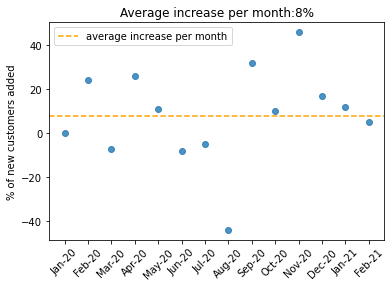

Code:-

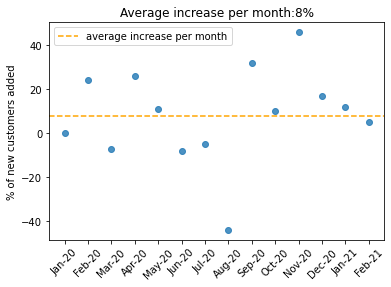

In [27]:
# Code to generate the below plot
result_df['customers_lag']=result_df['customers'].shift(1)
result_df['per_inc_cus_base']=(result_df['customers']-result_df['customers_lag'])/result_df['customers_lag']


sns.regplot(result_df.index,
            np.round(result_df['per_inc_cus_base']*100).fillna(0).astype('int'),
            ci=None,fit_reg=False,
            robust=True,
            line_kws={"linestyle": "--","color":"orange",'alpha':0.5})
plt.axhline(y=8,linestyle="--",color="orange",label="average increase per month")
plt.xticks(range(0,14))
plt.gca().set_xticklabels([x.strftime('%b-%y') for x in result_df['Month']])
plt.xticks(rotation=45)
average_per_increase_per_month=int(np.round(np.mean(result_df['per_inc_cus_base'].fillna(0)),2)*100)
plt.gca().set_title('Average increase per month:' + str(average_per_increase_per_month)+ '%')
plt.gca().set_ylabel('% of new customers added')
plt.legend()

<h4>3] There was a new service offerings release in November of 2020, which was a huge hit with our customers, resulting in a 46% increase in new customers from the prior month?</h4><br>

<b>Answer:</b> Yes there is 46.4% increase in new customer from prior month
   
    

In [28]:
# Lets check the per_inc_cus_base value for month of November
result_df.loc[result_df.Month.isin(['2020-11-01','2020-12-01']),['Month','per_inc_cus_base']]

,Month,per_inc_cus_base
10,2020-11-01,0.464485
11,2020-12-01,0.174387


<h4>4] The company predicts it will more than double its customer base in the next year?</h4>

<b>Answer:</b><br> Yes the figure seems achievable as per the provided data
* Total customer count for 2020 : 17477<br>
* Expected customer count for 2021 : 36382<br>
* % Increase in 2021 : 108 %<br><br>

We might need to imvestigate more the campaigns they run to increase <i><b>Base customer</b></i> and <i><b>Active customers</b></i> .

Although the figure seems impressing but, these numbers are of <i><b>Base customer</b></i>, who have subscribed to the service atleast once. The number of <i><b>Active customers</b></i> are likely to reduce or somewhat flatten (with variations between 4000to 4500) over the months after May-2020 as per the below plot :-

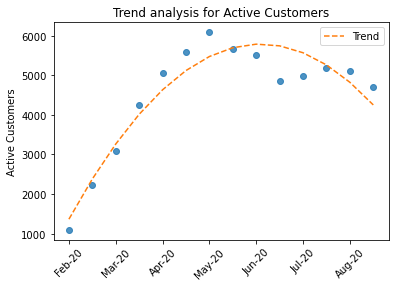

This means that EZ Yard is able to retain and stabilize considerable number of customers. <br>

<b>Note</b>: We can go for more complex time series modeling for the data rather than simple polynomieal regression , but since there was very less cyclicity/seasonality was observed due to lack of data. <br>
    
<b>The increase in active customer from Jan-2020 to May-2020</b> seems interesting, but this trend can be considered as 'cold start' , where new customer are exploring and mostly trying out the service for first time. 



Code to generate infor for above inferencing:-

Text(0.5, 1.0, 'Customers Base')

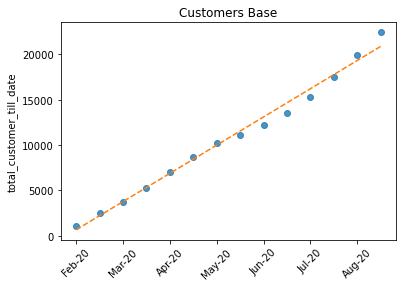

In [29]:
# Plotting total number of 'Base Customers' for each month

# Fitting a regression line on 'total_customer_till_date'
m, b = np.polyfit(result_df.index, result_df['total_customer_till_date'], 1)

# Plotting scatter of total_customer_till_date against months
sns.regplot(result_df.index,
            result_df['total_customer_till_date'],
            ci=None,fit_reg=False,
            robust=True,
            line_kws={"linestyle": "--","color":"orange"})

# Plotting Regresion line
plt.plot(result_df.index,m*result_df.index+b,linestyle='--')

plt.gca().set_xticklabels([x.strftime('%b-%y') for x in result_df['Month']])
plt.xticks(rotation=45)
plt.gca().set_title('Customers Base')

The trend seems pretty much linear

In [30]:
# Total customer base for 2020:-
print('Total customer count for 2020 :',int(result_df.iloc[0:12,result_df.columns.tolist().index('customers')].sum()))

Total customer count for 2020 : 17477


In [31]:
# Calculating total customer base till Dec-2021, using the regression line fitted above
total_customers_2021=int(np.round(m*23+b))
total_customers_2020=int(result_df.iloc[0:12,result_df.columns.tolist().index('customers')].sum())
print('Total Customer Base for 2020 :',total_customers_2020)
print('Expected Customer Base for 2021 :',total_customers_2021)
print('% Increase in 2021 :',int(np.round(((total_customers_2021-total_customers_2020)/total_customers_2020)*100)),'%')

Total Customer Base for 2020 : 17477
Expected Customer Base for 2021 : 36382
% Increase in 2021 : 108 %


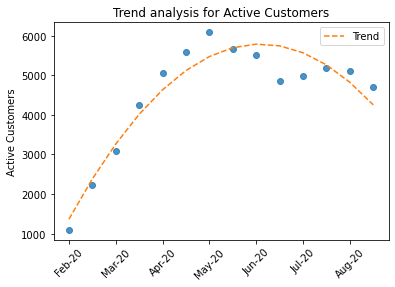

In [32]:
# Prediction of customers who will be retained

a, b,c = np.polyfit(result_df.index, result_df['active_customer_count'], 2)

sns.regplot(result_df.index,
            result_df['active_customer_count'],
            ci=None,fit_reg=False,
            robust=True,
            line_kws={"linestyle": "--","color":"orange"})
plt.plot(result_df.index,a*np.square(result_df.index)+b*result_df.index+c,linestyle='--',label='Trend')
plt.gca().set_xticklabels([x.strftime('%b-%y') for x in result_df['Month']])
plt.xticks(rotation=45)
plt.gca().set_title('Trend analysis for Active Customers')
plt.gca().set_ylabel('Active Customers')
plt.legend()

<h4>5] The January 2021 gain for new customers was a 120% improvement over of January of 2020? </h4> <br>

<b>Answer:</b> Yes the same seems correct there has been an increase of 131% of new customers <br>

<b>Code:-</b>

In [33]:
jan_2020=result_df.loc[result_df.Month=='2020-01-01','customers'].values[0]
jan_2021=result_df.loc[result_df.Month=='2021-02-01','customers'].values[0]
per_incre_jan2020_jan2021=int(np.round(((jan_2021-jan_2020)/jan_2020)*100))
print('January 2021 Gain for new customers over January 2020:',per_incre_jan2020_jan2021,'%')

January 2021 Gain for new customers over January 2020: 131 %


<h4> 6] Since January of 2020, EZ Yard has grown its customer base by 1,841%?</h4><br>

<b>Answer:</b> Yes there has been a 1943% growth in customer base since January 2020

In [34]:
print('Total Customers in January 2020:',1098)
print('Total Customer in February 2021:',22430)
print('% Increase:',int(np.round((22430-1098)*100/1098)))

Total Customers in January 2020: 1098
Total Customer in February 2021: 22430
% Increase: 1943


<h4> 7] EZ Yard boasts a customer retention rate of 58%. </h4><br>

<b>Answer:-</b>
After analysing the given data we generate the following plot :-
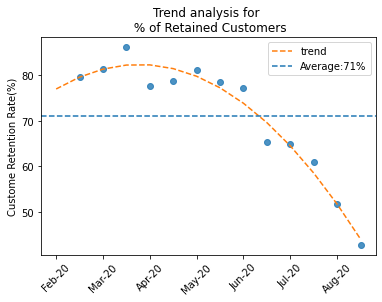

* Looking at this it does seems that the customer retension rate goes as below as 50%.<br>
* On the other hand the trend show a fall in retension rate.



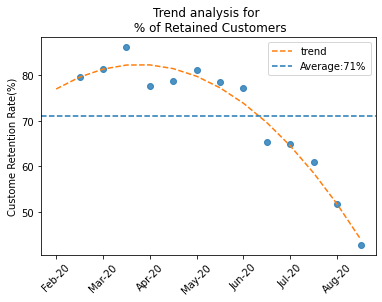

In [35]:
# plotting total_retension_per
red_df=result_df[['total_retension_per','active_customer_count']].dropna()
a,b,c = np.polyfit(red_df.index, red_df['total_retension_per'].values*100, 2)

sns.regplot(result_df.index,
            result_df['total_retension_per']*100,
            ci=None,fit_reg=False,
            robust=True)

plt.plot(result_df.index,a*np.square(result_df.index)+ b*result_df.index+c,linestyle='--',label='trend')


avg_l=np.average(red_df['total_retension_per'],weights=red_df['active_customer_count'])
average=int(np.round(avg_l*100,0))
plt.axhline(y=average,label='Average:' + str(average) + '%',linestyle='--')
plt.gca().set_xticklabels([x.strftime('%b-%y') for x in result_df['Month']])
plt.xticks(rotation=45)
plt.gca().set_title('Trend analysis for \n % of Retained Customers')
plt.gca().set_ylabel('Custome Retention Rate(%)')

plt.legend()

<h4>Conclusion:-</h4><br>

Pros:-
* We might get a Customer base of 22430 customers.
* The Customer base seems increasing every month, these customers can be targeted via some maketing campaigns, and can be converted to 'Active Customers'
* Most of the information provided in EZ Yard Fact Sheet is correct
* EZ Yard does has some skilled 'new service offerings', which has boosted the new customer subscription by 46%. It might be interesting to know what they did and can the same be applied to inactive customers
* Active customer in the system also seems showing some what flattend 

Cons:-
* Customer Retention rate show negetive trend over months.<br><br>

<b>Yes we can go ahead and acquire EZ Yard,because of the above mentions Pros.</b>

<h4>Question 5:Part2: Bonus</h4><br>
What other data sources would be helpful in making your recommendation?<br>

<b>Answer:-</b><br>
* Pricing data of EZ Yard services will be quit helpful to do a profit analysis.
* Total Customer Base and Active Customer of Frontdoor might be helpful. On comparing the same with EZ Yard we might get an idea  about ratio of how much % of customer base EZ Yard might add to FrontDoor.